In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
path = r"https://www.mof.go.jp/english/jgbs/reference/interest_rate/historical/jgbcme_all.csv"

### Download JGB yield from MOF

In [16]:
raw = pd.read_csv(path, header=1, index_col="Date")

In [226]:
df = raw[raw.index > "2018/9/22"]

In [227]:
df = df.astype(np.float64)

In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

### Set unit number in hidden layer half of grid points

In [285]:
n = int(scaled.shape[1] / 2)
n=5

In [286]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(hidden_layer_sizes=(n,n), random_state=1, max_iter=500).fit(scaled, scaled)

In [287]:
autoencoder = lambda curve: scaler.inverse_transform(regr.predict(scaler.transform(curve)))

In [288]:
i = 0
np.array(autoencoder(df.iloc[i,:].reshape(1, -1))) - np.array(df.iloc[i, :], dtype = np.float64)

/Users/yuseki/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


array([[-0.06508411, -0.01237065,  0.00666844,  0.01907467,  0.02506496,
         0.02327086,  0.02842646, -0.02908353, -0.02298935, -0.00839403,
        -0.03387221, -0.12584896, -0.12924099, -0.13041737, -0.20018305]])

In [289]:
reproduction = autoencoder(df)
reproduction = pd.DataFrame(reproduction, index=df.index, columns=df.columns)

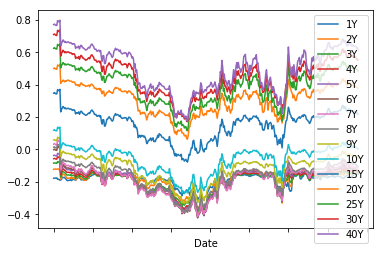

In [290]:
reproduction.plot()

In [301]:
tenor = "30Y"

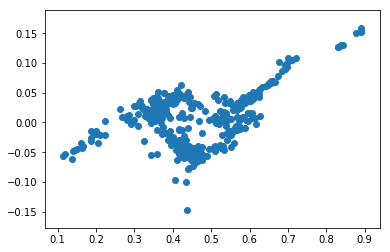

In [302]:
diff = df[tenor] - reproduction[tenor]
# plt.plot(diff.index, diff, label = tenor)
plt.scatter(df[tenor], diff)

In [296]:
# current = pd.read_csv(r"https://www.mof.go.jp/english/jgbs/reference/interest_rate/jgbcme.csv", header=1, index_col="Date")
# current = np.array(current)

In [297]:
reproduction_current = scaler.inverse_transform(regr.predict(scaler.transform(current)))

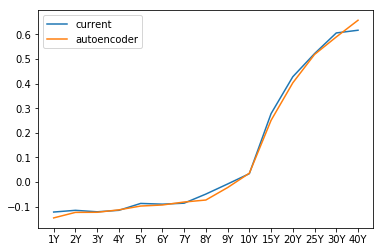

In [298]:
plt.plot(current[-1], label="current")
plt.plot(reproduction_current[-1], label="autoencoder")
plt.legend()
plt.xticks(range(len(df.columns)), df.columns)
plt.show()

In [299]:
rich_cheap = pd.DataFrame(current[-1] - reproduction_current[-1], index=df.columns)

In [300]:
rich_cheap*100

,0
1Y,2.388156
2Y,0.842158
3Y,0.196813
4Y,-0.188019
5Y,1.063431
6Y,0.337002
7Y,-0.470388
8Y,2.414993
9Y,1.452046
10Y,-0.180589
